In [1]:
import matplotlib.pyplot as plt
from scipy import signal
import scipy.io
import scipy
import numpy as np

# load initial file
mat = scipy.io.loadmat('data/hourlyDataTrafficInBits.mat')
points = mat["hourlyDataTrafficInBits"]

Text(0, 0.5, 'Mean Bits')

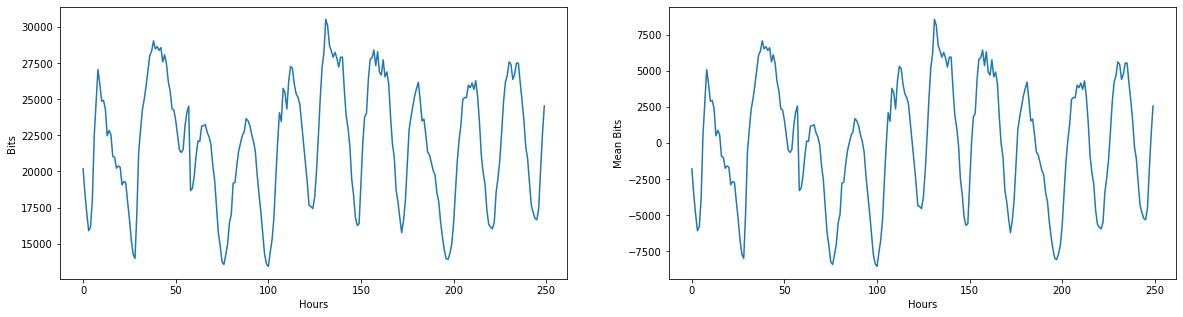

In [2]:
# get our axis
y = points[0]
x = np.arange(len(y))

# 1. first plot it, then find sample mean, substract and plot again
fig, ax = plt.subplots(ncols=2,figsize=(20,5))
ax[0].plot(x,y)
ax[0].set_xlabel("Hours")
ax[0].set_ylabel("Bits")

# Find the sample mean, and substract it
m = y.mean()
ax[1].plot(x,y-m)
ax[1].set_xlabel("Hours")
ax[1].set_ylabel("Mean Bits")

23
24


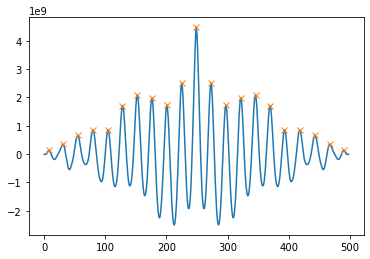

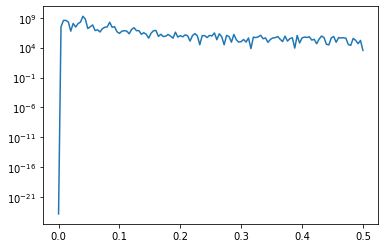

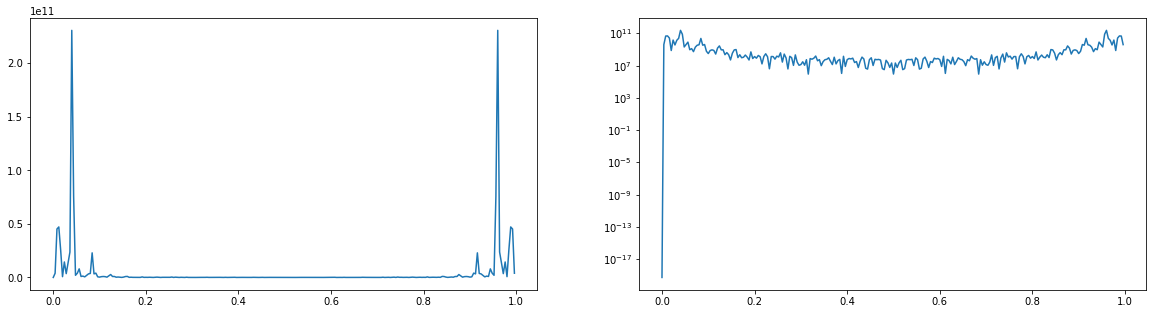

In [8]:
# xcorr
# periodgram
xcorr = lambda y: np.correlate(y, y, mode="full")
acf = xcorr(y-m)
fig, ax = plt.subplots()
ax.plot(acf)

# we take the peaks, and can see they are
# 24 hours apart
peaks, _ = signal.find_peaks(acf, height=0)
print((peaks[1]-peaks[0]))
print((peaks[10]-peaks[9]))
ax.plot(peaks, acf[peaks], "x")

# periodogram
f, pg = signal.periodogram(y-m)
fig, ax = plt.subplots()
ax.semilogy(f, pg)

# doing it without scipys function
def periodogram(y):
    f = np.arange(len(y))/len(y)
    sx = np.power(np.abs(scipy.fft.fft(y-m)), 2)
    return f, sx

f, sx = periodogram(y)
fig, ax = plt.subplots(ncols=2, figsize=(20,5))
ax[0].plot(f, sx)
ax[1].semilogy(f, sx)




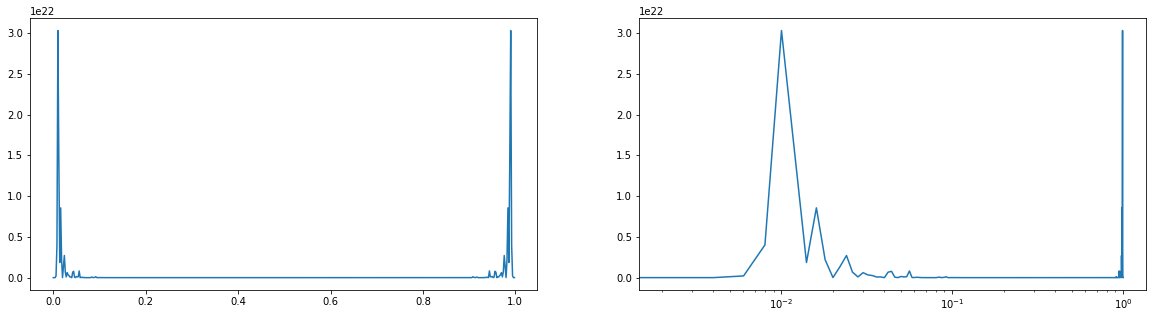

In [4]:
rpy = np.zeros(len(y))
data = y-m
for i in range(len(y)):
    rpy[i] = data[i] - data[(i - 25) % len(data)]
    
acf = xcorr(rpy) 
f, sx = periodogram(acf)
    
fig, ax = plt.subplots(ncols=2, figsize=(20,5))
ax[0].plot(f, sx)
ax[1].semilogx(f, sx)